# Dataset Cleaning
*(This notebook was inspired by Anton T. Ruberts' Dataset Cleaning notebook.)*
The dataset came from the [Online Retail Customer Churn Dataset](https://www.kaggle.com/datasets/hassaneskikri/online-retail-customer-churn-dataset) from kaggle.com.

The main objectives of this notebook are:
- Observe the contents of the dataset,
- handle missing, duplicate, incorrect, or outlier values, and
- export the cleaned data.

In [1]:
import pandas as pd

## Loading the dataset

In [2]:
data = pd.read_csv('../data/Customer Churn.csv')
data

,Call Failure,Complains,Subscription Length,Charge Amount,Seconds of Use,Frequency of use,Frequency of SMS,Distinct Called Numbers,Age Group,Tariff Plan,Status,Age,Customer Value,Churn
0,8,0,38,0,4370,71,5,17,3,1,1,30,197.640,0
1,0,0,39,0,318,5,7,4,2,1,2,25,46.035,0
2,10,0,37,0,2453,60,359,24,3,1,1,30,1536.520,0
3,10,0,38,0,4198,66,1,35,1,1,1,15,240.020,0
4,3,0,38,0,2393,58,2,33,1,1,1,15,145.805,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3145,21,0,19,2,6697,147,92,44,2,2,1,25,721.980,0
3146,17,0,17,1,9237,177,80,42,5,1,1,55,261.210,0
3147,13,0,18,4,3157,51,38,21,3,1,1,30,280.320,0
3148,7,0,11,2,4695,46,222,12,3,1,1,30,1077.640,0


In [3]:
print("Dataset shape:", data.shape)

Dataset shape: (3150, 14)


## Initial exploration of the data

Additional variable information:
- Call Failures: number of call failures
- Complains: binary (0: No complaint, 1: complaint)
- Subscription Length: total months of subscription
- Charge Amount: Ordinal attribute (0: lowest amount, 9: highest amount)
- Seconds of Use: total seconds of calls
- Frequency of use: total number of calls
- Frequency of SMS: total number of text messages
- Distinct Called Numbers: total number of distinct phone calls 
- Age Group: ordinal attribute (1: younger age, 5: older age)
- Tariff Plan: binary (1: Pay as you go, 2: contractual)
- Status: binary (1: active, 2: non-active)
- Churn: binary (1: churn, 0: non-churn) - Class label
- Customer Value: The calculated value of customer

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3150 entries, 0 to 3149
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Call  Failure            3150 non-null   int64  
 1   Complains                3150 non-null   int64  
 2   Subscription  Length     3150 non-null   int64  
 3   Charge  Amount           3150 non-null   int64  
 4   Seconds of Use           3150 non-null   int64  
 5   Frequency of use         3150 non-null   int64  
 6   Frequency of SMS         3150 non-null   int64  
 7   Distinct Called Numbers  3150 non-null   int64  
 8   Age Group                3150 non-null   int64  
 9   Tariff Plan              3150 non-null   int64  
 10  Status                   3150 non-null   int64  
 11  Age                      3150 non-null   int64  
 12  Customer Value           3150 non-null   float64
 13  Churn                    3150 non-null   int64  
dtypes: float64(1), int64(13)

**Observations**
- There are data input mismatches that we can iron out to make the notebook clean.
- Column name spacings are inconsistent.

**Actions**
- Change Tariff Plan, Status from int to categorical variables,
- Complains, Churn can be converted from int to bool,
- Drop Age Group because Age is less vague, and
- Rename columns with shortened names and use underscore for spaces.

In [5]:
data = data.drop('Age Group', axis=1)

new_name = list(['call_fails', 'complained', 'sub_length', 'charge_amt', 'seconds_used', 'usage_freq', 'sms_freq', 'unique_contacts_called', 'tariff_plan', 'status', 'age', 'cust_value', 'churn'])

data_renamed = data.copy()
data_renamed.columns = new_name
data_renamed

,call_fails,complained,sub_length,charge_amt,seconds_used,usage_freq,sms_freq,unique_contacts_called,tariff_plan,status,age,cust_value,churn
0,8,0,38,0,4370,71,5,17,1,1,30,197.640,0
1,0,0,39,0,318,5,7,4,1,2,25,46.035,0
2,10,0,37,0,2453,60,359,24,1,1,30,1536.520,0
3,10,0,38,0,4198,66,1,35,1,1,15,240.020,0
4,3,0,38,0,2393,58,2,33,1,1,15,145.805,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3145,21,0,19,2,6697,147,92,44,2,1,25,721.980,0
3146,17,0,17,1,9237,177,80,42,1,1,55,261.210,0
3147,13,0,18,4,3157,51,38,21,1,1,30,280.320,0
3148,7,0,11,2,4695,46,222,12,1,1,30,1077.640,0


In [6]:
data_renamed['complained'] = data_renamed['complained'].astype(bool)
data_renamed['churn'] = data_renamed['churn'].astype(bool)

plan_map = {1: 'Prepaid', 2: 'Contractual'}
data_renamed['tariff_plan'] = data_renamed['tariff_plan'].map(lambda x: plan_map.get(x, x))

status_map = {1: 'Active', 2: 'Inactive'}
data_renamed['status'] = data_renamed['status'].map(lambda x: status_map.get(x, x))

data_renamed

,call_fails,complained,sub_length,charge_amt,seconds_used,usage_freq,sms_freq,unique_contacts_called,tariff_plan,status,age,cust_value,churn
0,8,False,38,0,4370,71,5,17,Prepaid,Active,30,197.640,False
1,0,False,39,0,318,5,7,4,Prepaid,Inactive,25,46.035,False
2,10,False,37,0,2453,60,359,24,Prepaid,Active,30,1536.520,False
3,10,False,38,0,4198,66,1,35,Prepaid,Active,15,240.020,False
4,3,False,38,0,2393,58,2,33,Prepaid,Active,15,145.805,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3145,21,False,19,2,6697,147,92,44,Contractual,Active,25,721.980,False
3146,17,False,17,1,9237,177,80,42,Prepaid,Active,55,261.210,False
3147,13,False,18,4,3157,51,38,21,Prepaid,Active,30,280.320,False
3148,7,False,11,2,4695,46,222,12,Prepaid,Active,30,1077.640,False


In [7]:
data_renamed.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3150 entries, 0 to 3149
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   call_fails              3150 non-null   int64  
 1   complained              3150 non-null   bool   
 2   sub_length              3150 non-null   int64  
 3   charge_amt              3150 non-null   int64  
 4   seconds_used            3150 non-null   int64  
 5   usage_freq              3150 non-null   int64  
 6   sms_freq                3150 non-null   int64  
 7   unique_contacts_called  3150 non-null   int64  
 8   tariff_plan             3150 non-null   object 
 9   status                  3150 non-null   object 
 10  age                     3150 non-null   int64  
 11  cust_value              3150 non-null   float64
 12  churn                   3150 non-null   bool   
dtypes: bool(2), float64(1), int64(8), object(2)
memory usage: 277.0+ KB


In [8]:
data_renamed.describe()

,call_fails,sub_length,charge_amt,seconds_used,usage_freq,sms_freq,unique_contacts_called,age,cust_value
count,3150.000000,3150.000000,3150.000000,3150.000000,3150.000000,3150.000000,3150.000000,3150.000000,3150.000000
mean,7.627937,32.541905,0.942857,4472.459683,69.460635,73.174921,23.509841,30.998413,470.972916
std,7.263886,8.573482,1.521072,4197.908687,57.413308,112.237560,17.217337,8.831095,517.015433
min,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,15.000000,0.000000
25%,1.000000,30.000000,0.000000,1391.250000,27.000000,6.000000,10.000000,25.000000,113.801250
50%,6.000000,35.000000,0.000000,2990.000000,54.000000,21.000000,21.000000,30.000000,228.480000
75%,12.000000,38.000000,1.000000,6478.250000,95.000000,87.000000,34.000000,30.000000,788.388750
max,36.000000,47.000000,10.000000,17090.000000,255.000000,522.000000,97.000000,55.000000,2165.280000


### Missing Data

In [9]:
data.isna().sum()

Call  Failure              0
Complains                  0
Subscription  Length       0
Charge  Amount             0
Seconds of Use             0
Frequency of use           0
Frequency of SMS           0
Distinct Called Numbers    0
Tariff Plan                0
Status                     0
Age                        0
Customer Value             0
Churn                      0
dtype: int64

## Looking for Outliers

In [16]:
import seaborn as sns

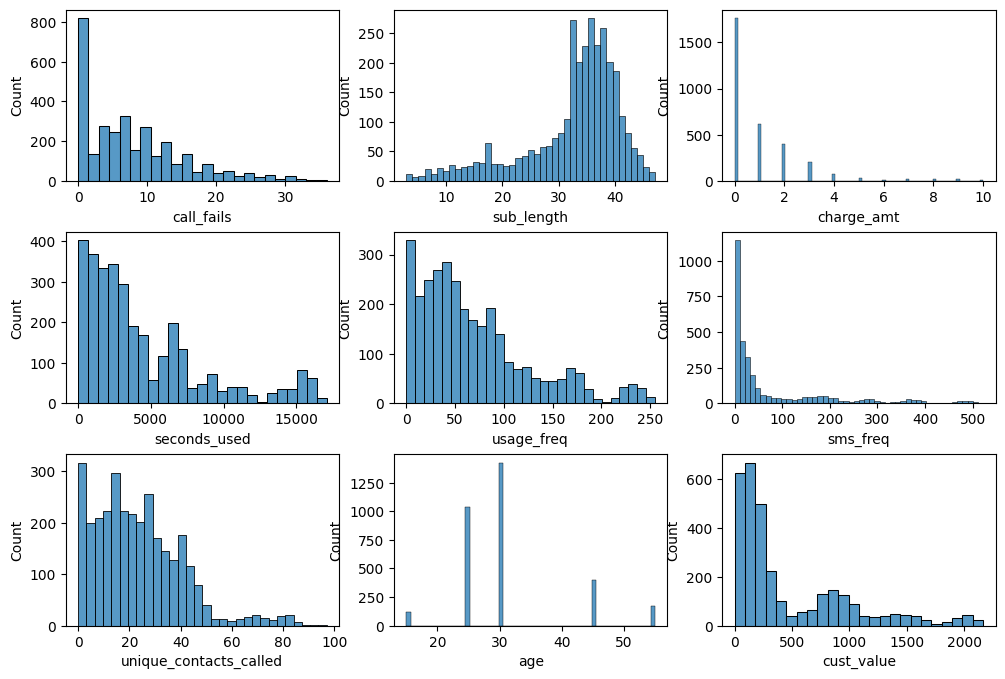

In [15]:
num_list = list(['call_fails', 'sub_length', 'charge_amt', 'seconds_used', 'usage_freq', 'sms_freq', 'unique_contacts_called', 'age', 'cust_value'])

len(num_list)

import matplotlib.pyplot as plt

fig1, axes = plt.subplots(3, 3, figsize=(12,8))

for i, cat in enumerate(num_list):
    sns.histplot(x=data_renamed[cat], ax=axes[(i//3), (i%3)])

fig1.subplots_adjust(hspace=0.3)

Here, there are no significant outliers and the values fit the distribution well. Additionally, the categorical values provide complete information. Therefore, we do not have to change values anymore.

## Data Pre-processing Pipeline

For this coffee dataset, we have a clean dataset such that we do not have to apply a pipeline. Nonetheless, I'm leaving this section here to serve as a template for future projects.

In [12]:
# data['transaction_date'] = pd.to_datetime(data['transaction_date'], format="mixed", dayfirst=True)
# data_renamed.to_csv('../data/Iranian_churn_cleaned.csv', index=False)  

In [13]:
data_renamed.head()

,call_fails,complained,sub_length,charge_amt,seconds_used,usage_freq,sms_freq,unique_contacts_called,tariff_plan,status,age,cust_value,churn
0,8,False,38,0,4370,71,5,17,Prepaid,Active,30,197.640,False
1,0,False,39,0,318,5,7,4,Prepaid,Inactive,25,46.035,False
2,10,False,37,0,2453,60,359,24,Prepaid,Active,30,1536.520,False
3,10,False,38,0,4198,66,1,35,Prepaid,Active,15,240.020,False
4,3,False,38,0,2393,58,2,33,Prepaid,Active,15,145.805,False
